In [1]:
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import numpy as np

In [2]:
# full period conditions (Hull–Dobell Theorem)
# m,c are coprimes (don't share prime factors)
# a-1 divisible by m's prime factor
# a-1 is multiple of 4 if m is multiple of 4

# ZX81 historically awful PRNG
#a, c, m, xs = 75, 74, 2**16+1, 47

# gcc m, a, c historically OK PRNG
a, c, m, xs = 1103515245, 12345, 2**31, 47

# numerical recipes m, a, c
#a, c, m, xs = 1664525, 1013904223, 2**32, 47

# period 2^8 m, a, c  (meets full-period conditions and 2^n)
#a, c, m, xs = 1664525, 1013904223, 2**8, 47

# ex. 1 - obvious flaw of incrementing by 1 i) c=2 and m=32 arent coprimes
#a, c, m, xs = 1, 2, 32, 7

# ex. 2 - obvious flaw of short period of 4 i) a-1=8 is a multiple of 2, ii) 1 and 32 are coprimes
#a, c, m, xs = 7, 0, 32, 7

# ex. 3 - less obvious flaw of repeating patterns of increments / decrements i) a-1=4 is a multiple of 2, ii) 1 and 32 are coprimes
#a, c, m, xs = 5, 3, 32, 1

# ex 4 - less obvious repeating increments / decrements with increasing m
#a, c, m, xs = 5, 3, 64, 1

# ex 5 - less obvious repeating increments / decrements with increasing m
#a, c, m, xs = 5, 3, 128, 1

# spectra test example 1 -drop me?
#a, c, m, xs = 3, 0, 31, 1

# spectra test example 2 -drop me?
#a, c, m, xs = 13, 0, 31, 1

N = 128
r = np.zeros(N, dtype=int)

r[0] = xs
for i in range(N-1):
    r[i+1] = ( a * r[i] + c) % m

# comparing gcc lcg with numpy randint
r[0] = xs
for i in range(N-1):
    r[i+1] = np.random.randint(0, 2**31)


Text(0, 0.5, 'random number value')

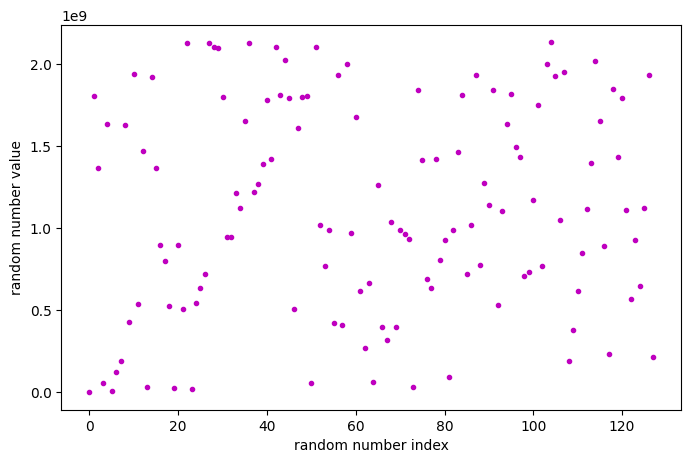

In [3]:

#distribution plot of random numbers

plt.figure(figsize=(8,5))
plt.plot( r,"m.") # distribution plot
plt.xlabel("random number index")
plt.ylabel("random number value")

Text(0, 0.5, 'random number frequency')

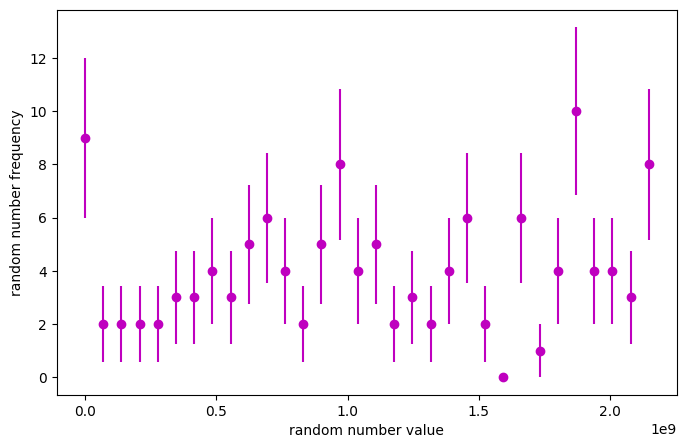

In [4]:
#frequency plot of random numbers
Nbins = 32
yf, bins = np.histogram( r, Nbins) # arg 1 - array to histogram, arg 2 - number of bins, can also give histogram limits
xf = np.linspace( 0, m-1, Nbins) # use linspace to make an array of bin lower edges
dyf = np.sqrt(yf)
dxf = 0.

plt.figure(figsize=(8,5))
plt.errorbar( xf, yf, xerr= dxf, yerr=dyf, fmt='mo')
plt.xlabel("random number value")
plt.ylabel("random number frequency")

Text(0, 0.5, 'x_n-1')

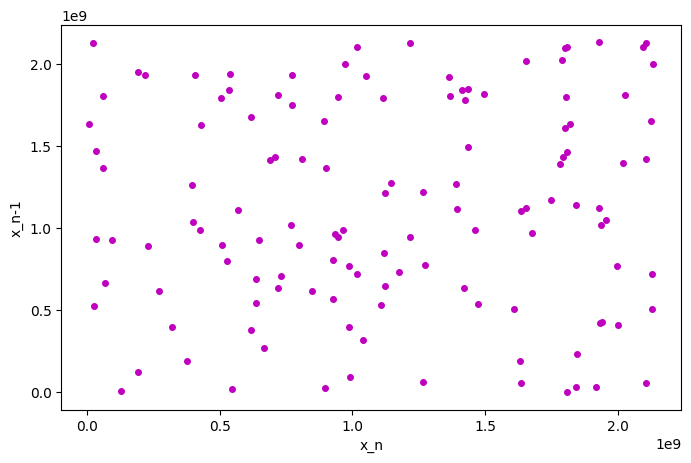

In [5]:
# spectral plot of x_n versus x_n-1

plt.figure(figsize=(8,5))
plt.plot(r[1:], r[:-1],"m.",markersize=8)
plt.xlabel("x_n")
plt.ylabel("x_n-1")

Text(0, 0.5, 'abs (Y(f_i))')

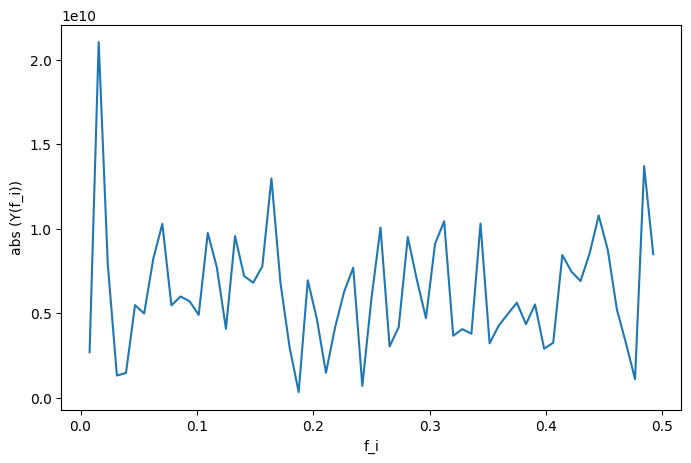

In [6]:
rf = fft(r)[1:N//2]      # get fft & remove mirror 0 ... Np/2-1, Np/2 ... Np-1
f = fftfreq(N,1)[1:N//2]

plt.figure(figsize=(8,5))
plt.plot(f,np.abs(rf))
plt.xlabel("f_i")
plt.ylabel("abs (Y(f_i))")

(-0.5, 31.5, 126.5, -0.5)

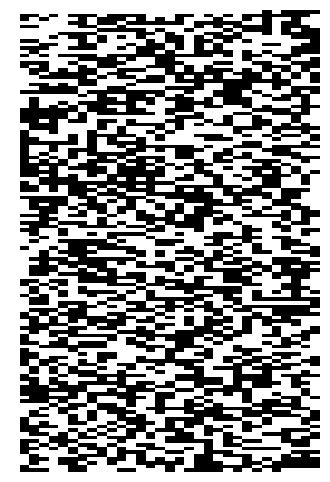

In [7]:
# plot the bit patterns of PRNGs
bits_array = []
for ir in range(N-1):
  bits = [(r[ir] >> i) & 1 for i in range(31, -1, -1)] # create list of bits using pythonic list comprehension by iterating over bits using bit-shift operation
  bits_array.append(bits)

fig = plt.figure(figsize=(4, 6))
plt.imshow(bits_array, cmap='binary', aspect='auto', interpolation='none')
plt.axis('off')  # Turn off axis labels and ticks

In [8]:
# duplicates test
s = np.sort(r) # (i) order random values in array
d = s[1:] == s[:-1] # (ii) test if neighboring elements are dublicates by left / right bookending using slicing
count_false = sum(d == False)
count_true = sum(d == True)
print("duplicates false, true ", count_false, count_true)
#print(s[:100),d[:100])

duplicates false, true  127 0


In [9]:
# runs test
runs = 0
for i in range(1, N-1):
    if r[i] > r[i - 1]:
       runs += 1

print("N/2, np.sqrt(N/2), runs ", N/2, np.sqrt(N/2), runs)

N/2, np.sqrt(N/2), runs  64.0 8.0 65


In [10]:
# chi-squared test
ndf = Nbins - 1
mean = np.mean(yf)
var = (( yf-mean) / dyf )**2
chi2 = var.sum() / ndf
print("mean, chi2, ndf ", mean, chi2, ndf)

mean, chi2, ndf  4.0 inf 31


<ipython-input-10-f91144fcc04d>:4: RuntimeWarning: divide by zero encountered in divide
  var = (( yf-mean) / dyf )**2


In [11]:
print(r)

[        47 1807510270 1366639780   57663276 1636832750    8200939
  126258479  190109447 1631771265  428561459 1939297287  537304743
 1472199388   32080009 1920058983 1365485627  899460778  800128469
  526079189   25657337  898110360  506524567 2130650949   21841710
  544140186  637172610  717778087 2129453178 2105446814 2097181252
 1802029668  944723562  944849375 1217560850 1123622061 1654984209
 2126250178 1217915359 1267561016 1392010908 1784112519 1424823922
 2107029544 1809666804 2027886677 1790913914  506094770 1610581042
 1801092976 1806586574   57932780 2107439404 1017789848  768167708
  987322534  424991819 1931918075  407352842 2001925398  971862168
 1677922507  616318594  270667736  668058764   65113422 1266164297
  395146599  319100417 1039691164  399874911  986163434  962637743
  934036318   33364886 1843778436 1413181644  688193294  636102485
 1418861124  808711039  927770881   94755583  990817694 1462830175
 1809492712  720776892 1018277028 1936005777  773750163 127349